In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from sklearn import datasets 
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

In [3]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df=features.copy()

In [5]:
df["Price"]=targets
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Analysis

In [6]:
# missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


No missing values in our dataset

In [8]:
# numerical values

In [9]:
numerical_features=[features for features in df.columns if df[features].dtype!='O']

In [10]:
numerical_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'Price']

All our features are numerical in nature

In [11]:
# discrete features

In [12]:
for features in df.columns:
    print("Column {} has {} unique values.".format(features,len(df[features].unique())))

Column CRIM has 504 unique values.
Column ZN has 26 unique values.
Column INDUS has 76 unique values.
Column CHAS has 2 unique values.
Column NOX has 81 unique values.
Column RM has 446 unique values.
Column AGE has 356 unique values.
Column DIS has 412 unique values.
Column RAD has 9 unique values.
Column TAX has 66 unique values.
Column PTRATIO has 46 unique values.
Column B has 357 unique values.
Column LSTAT has 455 unique values.
Column Price has 229 unique values.


In [13]:
print("ZN :",df['ZN'].unique())
print("CHAS :",df['CHAS'].unique())
print("RAD :",df['RAD'].unique())

ZN : [ 18.    0.   12.5  75.   21.   90.   85.  100.   25.   17.5  80.   28.
  45.   60.   95.   82.5  30.   22.   20.   40.   55.   52.5  70.   34.
  33.   35. ]
CHAS : [0. 1.]
RAD : [ 1.  2.  3.  5.  4.  8.  6.  7. 24.]


In [14]:
# continuous features
cont_features=[features for features in df.columns if len(df[features].unique())>9]
cont_features

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'Price']

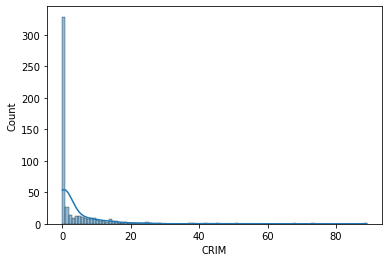

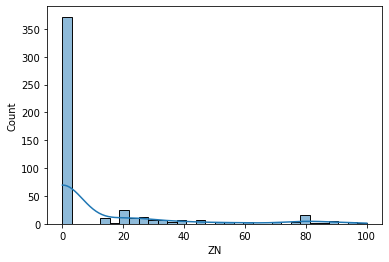

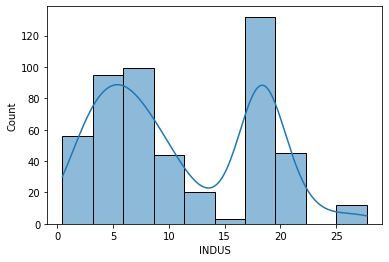

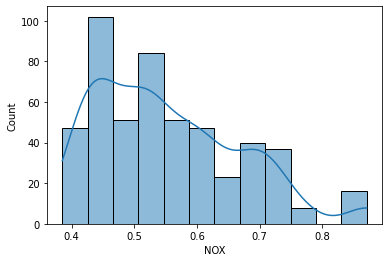

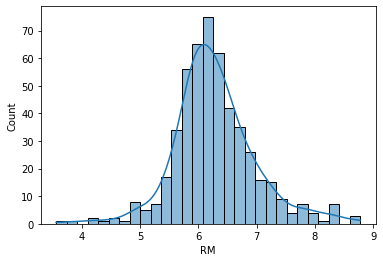

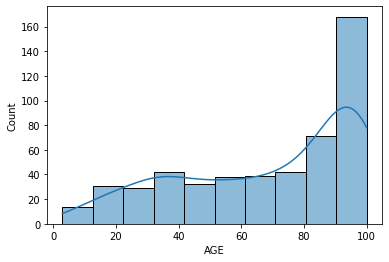

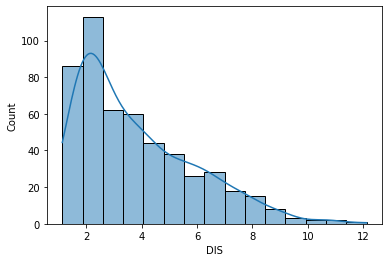

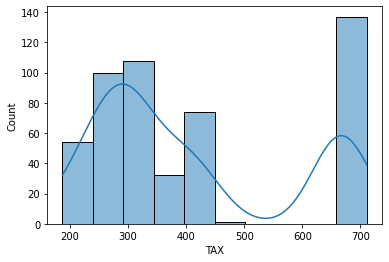

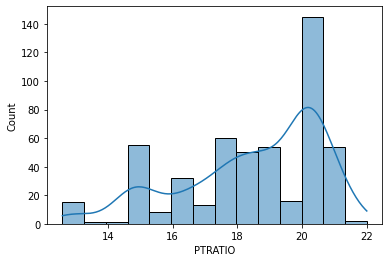

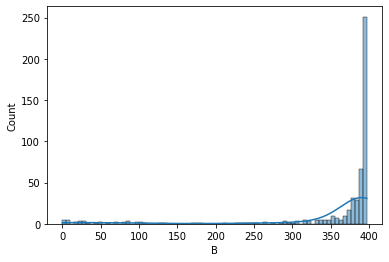

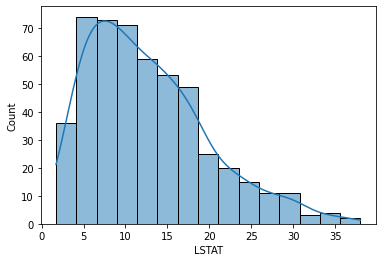

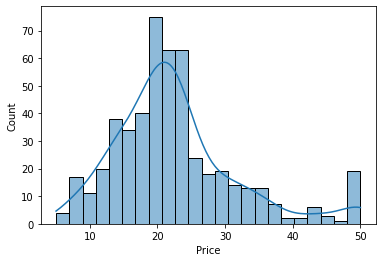

In [15]:
for features in cont_features:
    sns.histplot(df[features],kde=1)
    plt.show()

In [16]:
correlation=df.corr(method='pearson')
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

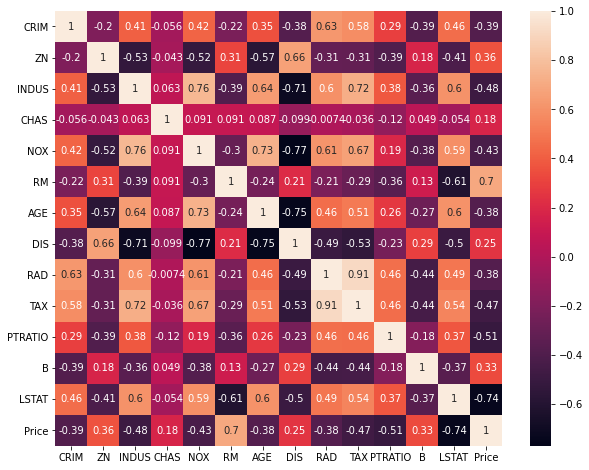

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)

In [18]:
# Outliers

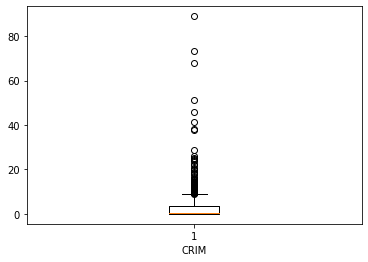

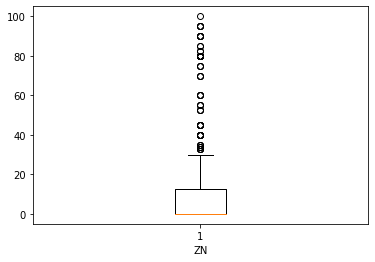

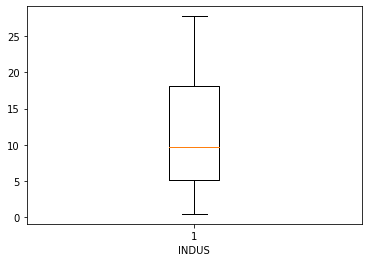

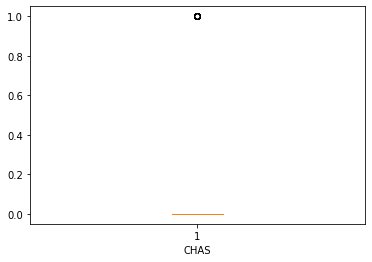

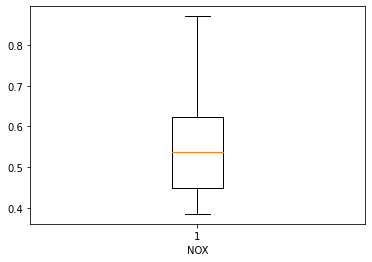

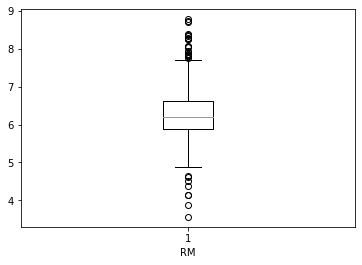

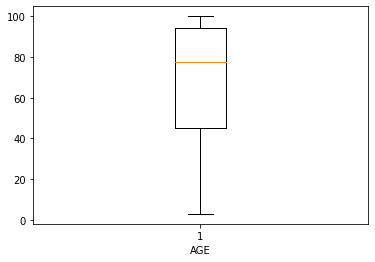

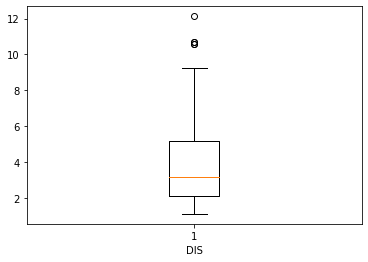

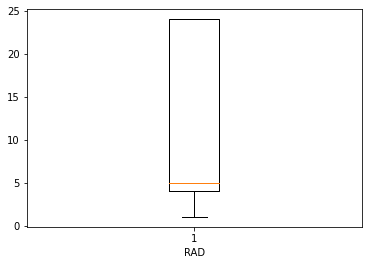

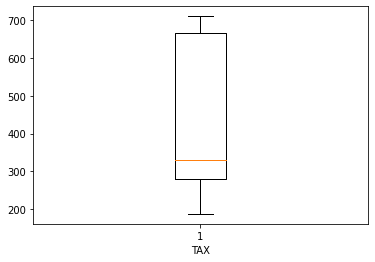

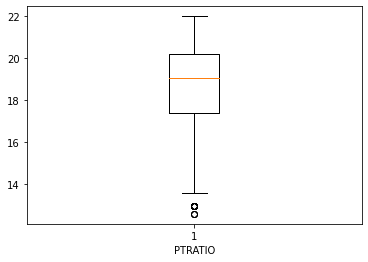

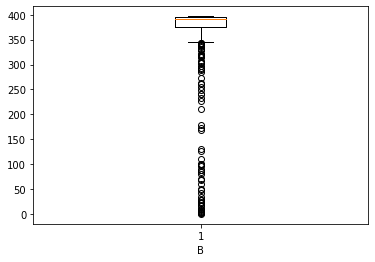

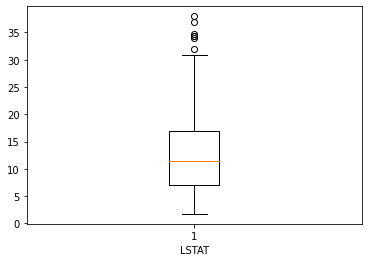

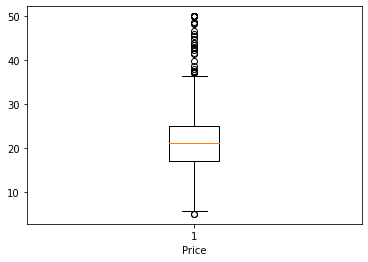

In [19]:
for features in df.columns:
    plt.boxplot(df[features])
    plt.xlabel(features)
    plt.show()

features CRIM,ZN,RM,B,LSTAT have a lot of outliers 

In [20]:
# Relationship between independent variables and dependent variables

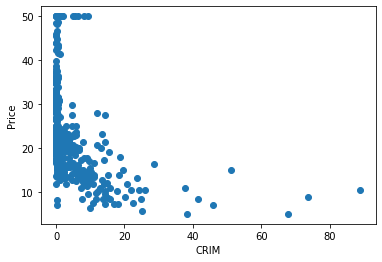

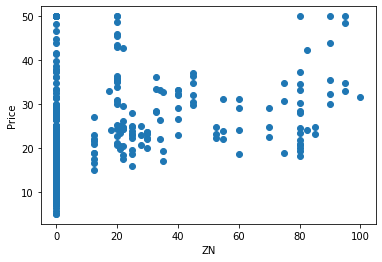

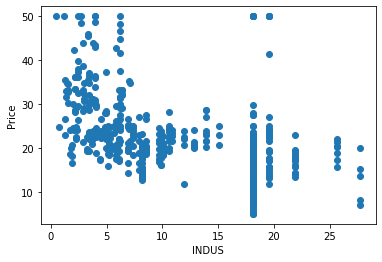

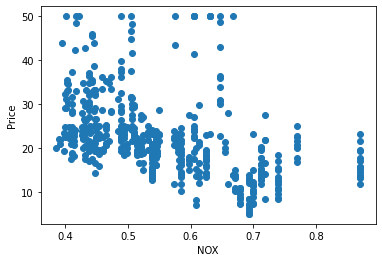

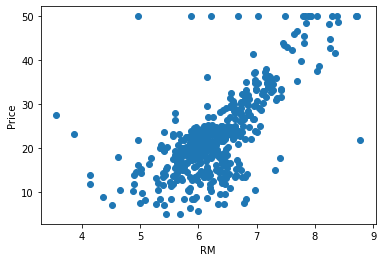

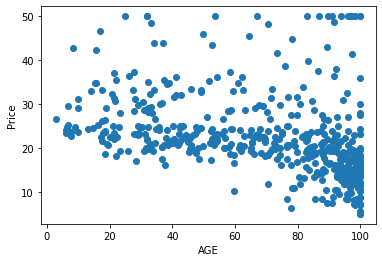

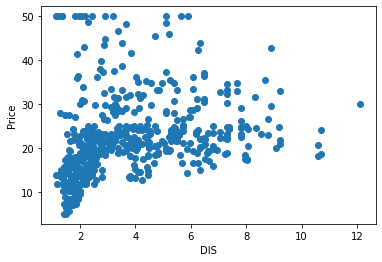

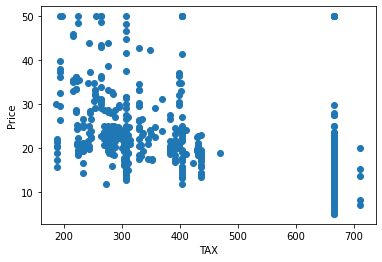

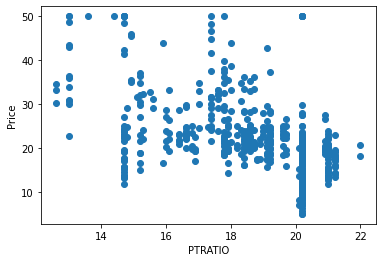

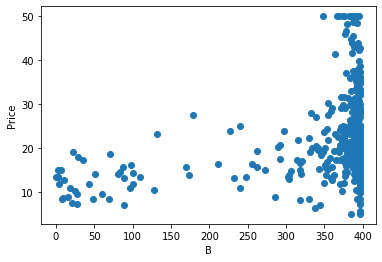

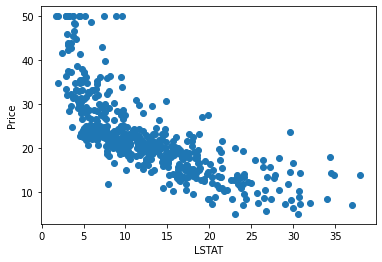

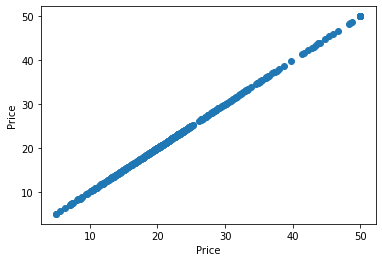

In [21]:
for features in cont_features:
    plt.scatter(df[features],df['Price'])
    plt.xlabel(features)
    plt.ylabel('Price')
    plt.show()

## Feature Engineering

In [22]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


a) We do not have to handle missing values.

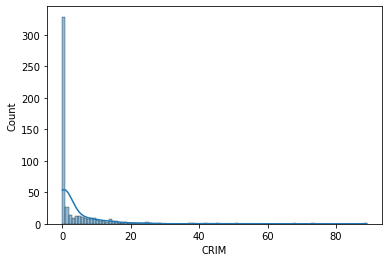

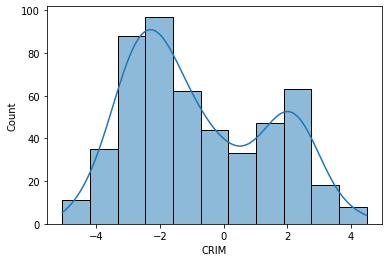

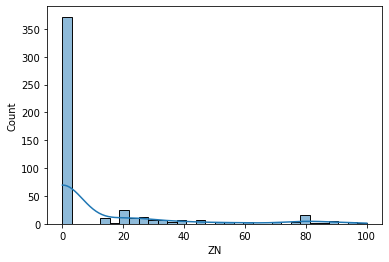

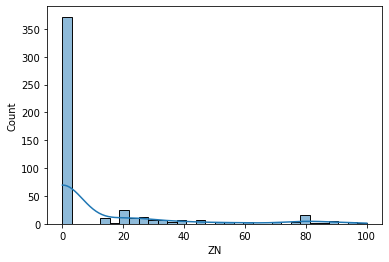

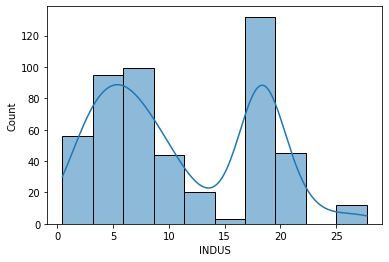

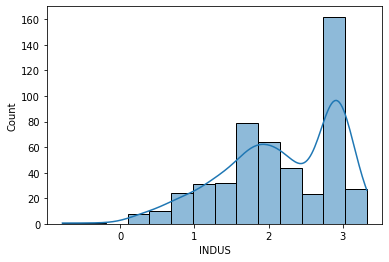

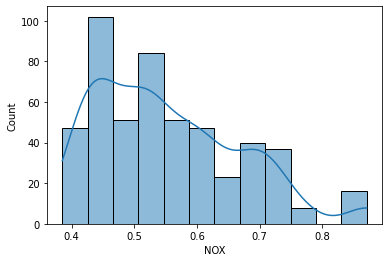

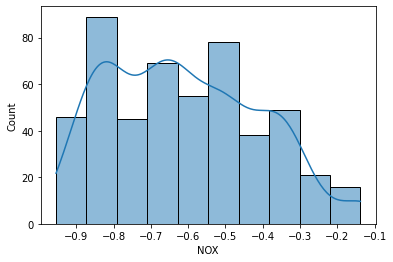

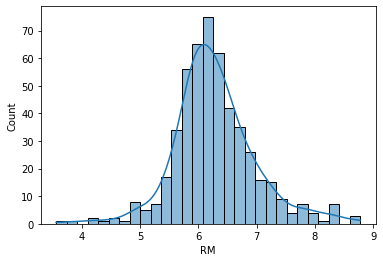

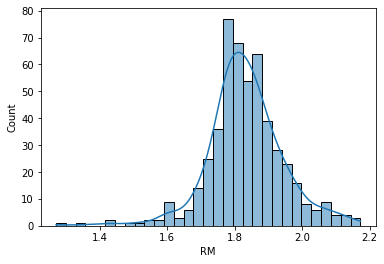

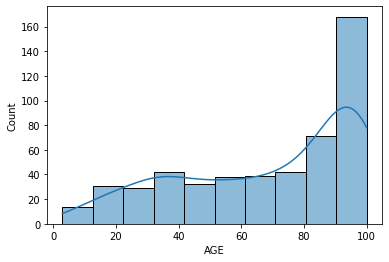

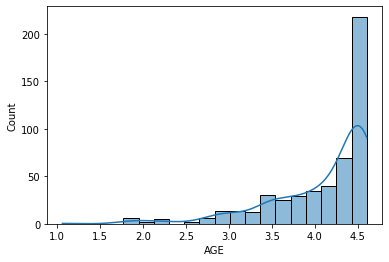

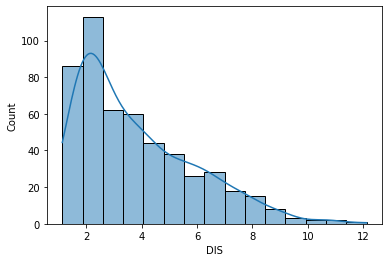

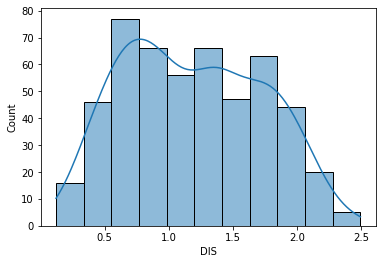

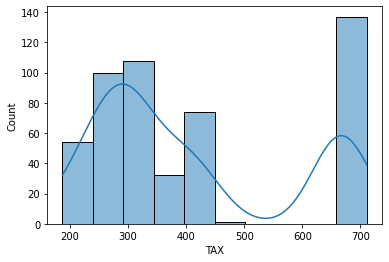

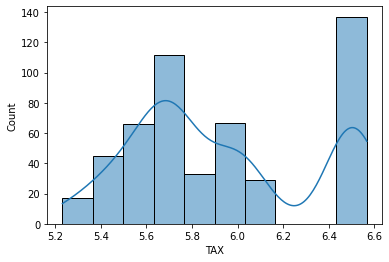

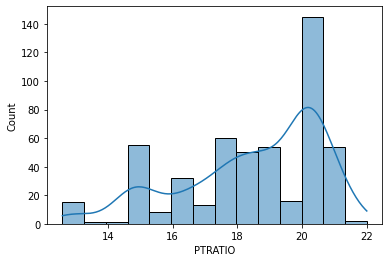

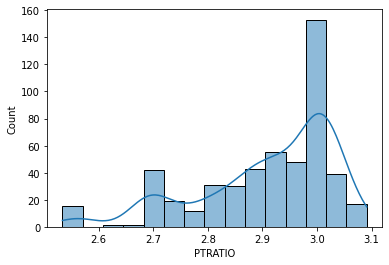

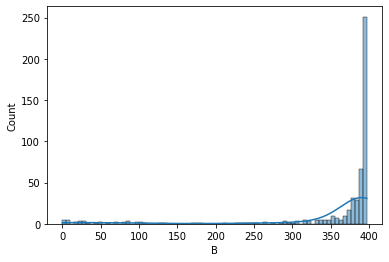

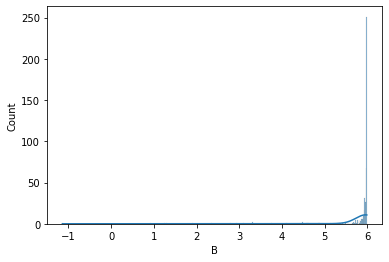

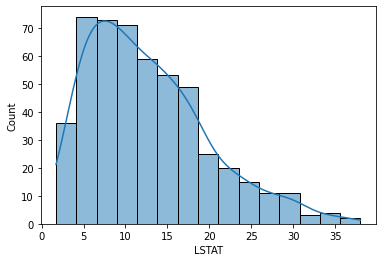

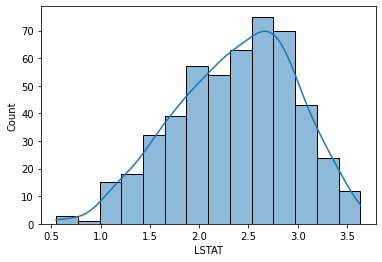

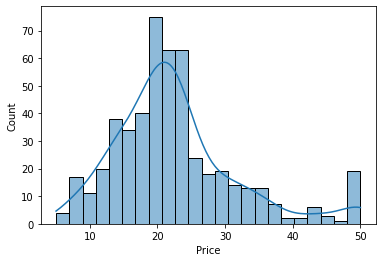

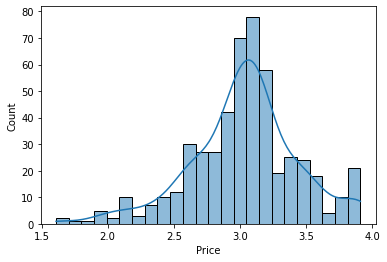

In [23]:
# log transformation
for features in cont_features:
    data=df.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features]=np.log(data[features])
    sns.histplot(df[features],kde=1)
    plt.show()
    sns.histplot(data[features],kde=1)
    plt.show()
    

We can see that our data is better normally distributed after log transformation so we will perform log normal distribution on our data 

In [24]:
for feature in df.columns:
    if 0 not in df[feature].unique():
        df[feature]=np.log(df[feature])

In [25]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-5.064036,18.0,0.837248,0.0,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,0.0,1.955860,0.0,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,0.0,1.955860,0.0,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,0.0,0.779325,0.0,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,0.0,0.779325,0.0,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,2.479056,0.0,-0.556870,1.886008,4.235555,0.907694,0.000000,5.609472,3.044522,5.971236,2.269028,3.109061
502,-3.095111,0.0,2.479056,0.0,-0.556870,1.811562,4.339902,0.827460,0.000000,5.609472,3.044522,5.983684,2.206074,3.025291
503,-2.800824,0.0,2.479056,0.0,-0.556870,1.942476,4.510860,0.773574,0.000000,5.609472,3.044522,5.983684,1.729884,3.173878
504,-2.211009,0.0,2.479056,0.0,-0.556870,1.916040,4.492001,0.870833,0.000000,5.609472,3.044522,5.974954,1.868721,3.091042


## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X=df.drop('Price',axis=1)
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=43)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [28]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
185,-2.805608,0.0,0.900161,0.0,-0.717440,1.816940,4.231204,1.187752,1.098612,5.262690,2.879198,5.958709,2.576422
36,-2.328518,0.0,1.785070,0.0,-0.695149,1.764902,4.117410,1.217254,1.609438,5.631212,2.954910,5.933729,2.434490
468,2.745712,0.0,2.895912,0.0,-0.544727,1.779349,4.262680,1.067603,3.178054,6.501290,3.005683,5.910092,2.897568
238,-2.495685,30.0,1.595339,0.0,-0.848632,1.868875,2.917771,1.822919,1.791759,5.703782,2.809403,5.938617,1.850028
261,-0.627135,20.0,1.378766,0.0,-0.435409,2.017566,4.493121,0.760712,1.609438,5.575949,2.564949,5.961958,1.982380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,-2.792465,40.0,1.857859,1.0,-0.805197,1.920739,3.317816,1.581614,1.386294,5.537334,2.867899,5.974954,1.425515
305,-2.904248,33.0,0.779325,0.0,-0.750776,1.889491,4.062166,1.214913,1.945910,5.402677,2.912351,5.974725,2.189416
255,-3.338786,80.0,1.291984,0.0,-0.936493,1.770876,2.949688,2.221408,0.000000,5.752573,2.797281,5.979341,2.224624
320,-1.786175,0.0,1.998774,0.0,-0.707246,1.860352,3.956996,1.513015,1.609438,5.659482,2.975530,5.983684,1.974081


## Scaling Data

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.906729,-0.508610,-1.593284,-0.263603,-0.495342,-0.195015,0.265412,-0.040184,-0.834829,-1.706992,-0.189152,0.261823,0.421101
1,-0.683012,-0.508610,-0.444361,-0.263603,-0.383748,-0.680099,0.080003,0.015385,-0.253205,-0.758206,0.406596,0.230465,0.179670
2,1.696399,-0.508610,0.997902,-0.263603,0.369304,-0.545423,0.316697,-0.266491,1.532817,1.481874,0.806104,0.200792,0.967383
3,-0.761400,0.727699,-0.690699,-0.263603,-1.152124,0.289111,-1.874615,1.156189,-0.045614,-0.571367,-0.738349,0.236601,-0.814520
4,0.114802,0.315596,-0.971887,-0.263603,0.916580,1.675176,0.692163,-0.844537,-0.253205,-0.900484,-2.661861,0.265902,-0.589386


In [30]:
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [31]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.118519,-0.508610,0.997902,-0.263603,1.787891,0.168959,0.666446,-0.537833,1.532817,1.481874,0.806104,0.220451,-0.469529
1,1.190285,-0.508610,0.997902,-0.263603,1.310743,-0.350840,0.561291,-0.820049,1.532817,1.481874,0.806104,0.233189,1.025488
2,-0.353932,0.398017,-0.466330,-0.263603,-1.117156,-0.085071,0.494778,1.652385,0.129902,-0.325984,0.365506,0.225735,-0.019379
3,-1.582205,3.612420,-2.401546,-0.263603,-1.355028,0.758909,-0.597977,1.714324,-0.253205,-0.979708,-1.483570,0.280460,-1.624745
4,-0.331778,0.398017,-0.466330,-0.263603,-1.117156,-1.084534,0.438264,1.628715,0.129902,-0.325984,0.365506,0.213494,0.334870


In [32]:
from pickle import dump
dump(scaler,open('../scaler.pkl','wb'))

## Model Building

### Direct

In [33]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=99)

model.fit(X_train,y_train)

RandomForestRegressor(random_state=99)

### Evaluation

In [34]:
from sklearn import metrics
print("Accuracy on the Train data is {} % for our Random Forest Regression model.".format(100*metrics.r2_score(y_train,model.predict(X_train))))

Accuracy on the Train data is 97.8636205239377 % for our Random Forest Regression model.


In [35]:
print("Accuracy on the Test data is {} % for our Random Forest Regression model.".format(100*metrics.r2_score(y_test,model.predict(X_test))))

Accuracy on the Test data is 83.61931093915376 % for our Random Forest Regression model.


In [36]:
y_pred=model.predict(X_test)

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.12164269970869737
MSE: 0.03373385650931113
RMSE: 0.18366778843692524


### Grid Search for best parameters

In [38]:
parameter ={
 "criterion" : ["squared_error", "absolute_error", "poisson"],
 "max_depth" : [1,2,3,4,5,6,7,None],
 "max_features": ['sqrt', 'log2', None]
}

In [39]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(model,parameter,scoring='neg_mean_squared_error',cv=10)

In [40]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=99),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='neg_mean_squared_error')

In [41]:
grid.best_score_

-0.022116588210638048

In [42]:
grid.best_params_

{'criterion': 'poisson', 'max_depth': None, 'max_features': 'sqrt'}

## Evaluation

In [43]:
print("Accuracy on the Train data is {} % for our Grid Search Random Forest Regression model.".format(100*metrics.r2_score(y_train,grid.predict(X_train))))

Accuracy on the Train data is 98.12274102476208 % for our Grid Search Random Forest Regression model.


In [44]:
print("Accuracy on the Test data is {} % for our Grid Search Random Forest Regression model.".format(100*metrics.r2_score(y_test,grid.predict(X_test))))

Accuracy on the Test data is 83.03610513248587 % for our Grid Search Random Forest Regression model.


In [45]:
y_pred=grid.predict(X_test)

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.11957073434978825
MSE: 0.034934891516108076
RMSE: 0.18690877859562421


In [47]:
from pickle import dump
dump(grid,open('../model.pkl','wb'))

In [48]:
X_train


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.906729,-0.508610,-1.593284,-0.263603,-0.495342,-0.195015,0.265412,-0.040184,-0.834829,-1.706992,-0.189152,0.261823,0.421101
1,-0.683012,-0.508610,-0.444361,-0.263603,-0.383748,-0.680099,0.080003,0.015385,-0.253205,-0.758206,0.406596,0.230465,0.179670
2,1.696399,-0.508610,0.997902,-0.263603,0.369304,-0.545423,0.316697,-0.266491,1.532817,1.481874,0.806104,0.200792,0.967383
3,-0.761400,0.727699,-0.690699,-0.263603,-1.152124,0.289111,-1.874615,1.156189,-0.045614,-0.571367,-0.738349,0.236601,-0.814520
4,0.114802,0.315596,-0.971887,-0.263603,0.916580,1.675176,0.692163,-0.844537,-0.253205,-0.900484,-2.661861,0.265902,-0.589386
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,-0.900566,1.139802,-0.349855,3.793587,-0.934675,0.772575,-1.222806,0.701678,-0.507275,-0.999901,-0.278064,0.282216,-1.536633
350,-0.952983,0.851330,-1.750172,-0.263603,-0.662232,0.481290,-0.010008,0.010975,0.129902,-1.346585,0.071710,0.281929,-0.237209
351,-1.156748,2.788214,-1.084561,-0.263603,-1.591982,-0.624408,-1.822610,1.906764,-2.085706,-0.445753,-0.833728,0.287724,-0.177320
352,-0.428696,-0.508610,-0.166899,-0.263603,-0.444309,0.209666,-0.181365,0.572468,-0.253205,-0.685422,0.568841,0.293176,-0.603502


In [65]:
from pickle import load
x_input=[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]

for i in range(0,len(x_input)):
    if x_input[i]!=0:
        x_input[i]=np.log(x_input[i])
            
scalefile = '../scaler.pkl' 
loaded_scaler = load(open(scalefile, 'rb'))
x_input_scaled=loaded_scaler.transform([x_input])
            
filename = '../model.pkl'
loaded_model = load(open(filename, 'rb'))
           
            
prediction=loaded_model.predict(x_input_scaled)

prediction=np.exp(prediction)[0]
np.round(prediction,2)

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


26.75

In [93]:
a=pd.DataFrame(np.exp(y_pred),columns=['Predicted'])
b=pd.DataFrame(np.exp(y_test.to_numpy()),columns=['Actual'],index=None)

In [103]:
pd.concat(a,b,axis=1)

TypeError: concat() got multiple values for argument 'axis'